# Creating a fraud identification model
- Base information:
     - 'Time': contains the seconds elapsed between each transaction and the first transaction in the dataset.
     - 'Amount': is the value of the transaction
     - 'Class': is the response variable and takes value 1 in case of fraud and 0 otherwise.
     - "Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Characteristics V1, V2, … V28 are the main components obtained with PCA"

In [9]:
# Importando o pandas
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Importando a base
transacoes = pd.read_csv('creditcard.csv')

In [11]:
# Visualizando a base
transacoes.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [12]:
# Verificando as informações
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# E também o resumo estatístico
transacoes.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
# Verificando também se existem valores nulos
transacoes.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Qual o percentual de transações que são fraudes?**

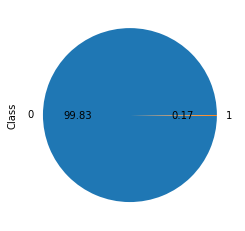

In [15]:
# Verificando visualmente o % de transações que são fraude
transacoes.Class.value_counts().plot.pie(autopct='%.2f');

### Criando um modelo de aprendizado de máquinas para identificar fraude
- Vamos criar um modelo para identificar fraude sem fazer nenhum tratamento nessa base

In [16]:
# Separando X e y
X = transacoes.drop('Class',axis=1)
y = transacoes.Class

In [17]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [18]:
# Verificando a distribuição das duas classes na base de treino e teste
y_train.value_counts()/y_train.shape[0]

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [19]:
# Para a base de teste
y_test.value_counts()/y_test.shape[0]

0    0.998276
1    0.001724
Name: Class, dtype: float64

In [20]:
y_test.value_counts()

0    93825
1      162
Name: Class, dtype: int64

In [21]:
# Importando a árvore de decisão
from sklearn import tree

In [22]:
# Definindo o nosso classificador
clf = tree.DecisionTreeClassifier(random_state=42)

In [23]:
# Fazendo o fit para os dados de treino
clf = clf.fit(X_train, y_train)

In [24]:
# Fazendo a previsão
y_pred = clf.predict(X_test)

In [25]:
# Importando a acurácia
from sklearn.metrics import accuracy_score

In [26]:
# Calculando a acurácia
accuracy_score(y_test,y_pred)

0.9991594582229457

**Verificando agora a matriz de confusão, a precisão e o recall**

In [27]:
# Importando a matriz de confusão
from sklearn.metrics import confusion_matrix

In [28]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_pred)

array([[93786,    39],
       [   40,   122]], dtype=int64)

In [29]:
# Calculando a precisão
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7577639751552795

In [30]:
# E o recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.7530864197530864

## Selecionando de forma aleatória

#### Realizando o random undersampling

In [31]:
# Importando o RandomUnderSampler do imblearn
from imblearn.under_sampling import RandomUnderSampler 

In [32]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [33]:
# Definindo a nova amostra
X_res, y_res = rus.fit_resample(X_train, y_train)

In [34]:
# Verificando a quantidade de valores de y
y_res.value_counts()

0    330
1    330
Name: Class, dtype: int64

In [35]:
# Fazendo o fit para os dados de treino já balanceados
clfRU = tree.DecisionTreeClassifier(random_state=42)
clfRU = clfRU.fit(X_res, y_res)

In [36]:
# Fazendo a previsão para os dados de teste
y_predRU = clfRU.predict(X_test)

In [37]:
# Calculando a acurácia
accuracy_score(y_test,y_predRU)

0.9004543181503825

In [38]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predRU)

array([[84484,  9341],
       [   15,   147]], dtype=int64)

In [39]:
precision_score(y_test,y_predRU)

0.015493254637436763

In [40]:
recall_score(y_test,y_predRU)

0.9074074074074074

#### Realizando o random oversampling

In [41]:
# Importando
from imblearn.over_sampling import RandomOverSampler 

In [42]:
# Definindo o ros
ros = RandomOverSampler(random_state=42)

In [43]:
# Refazendo nossa amostra
X_res, y_res = ros.fit_resample(X_train, y_train)
y_res.value_counts()

0    190490
1    190490
Name: Class, dtype: int64

In [44]:
# Fazendo o fit para os dados de treino já balanceados
clfRO = tree.DecisionTreeClassifier(random_state=42)
clfRO = clfRO.fit(X_res, y_res)

In [45]:
# Fazendo a previsão para os dados de teste
y_predRO = clfRO.predict(X_test)

In [46]:
# Calculando a acurácia
accuracy_score(y_test,y_predRO)

0.9991062593762967

In [47]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predRO)

array([[93793,    32],
       [   52,   110]], dtype=int64)

In [48]:
precision_score(y_test,y_predRO)

0.7746478873239436

In [49]:
recall_score(y_test,y_predRO)

0.6790123456790124

## Usando outras formas de undersampling

#### ClusterCentroids

In [50]:
# Importando o ClusterCentroids
from imblearn.under_sampling import ClusterCentroids 

In [51]:
# Definindo
cc = ClusterCentroids(random_state=42)

In [52]:
# Criando a amostra dos dados
X_res, y_res = cc.fit_resample(X_train, y_train)

In [53]:
# Fazendo o fit para os dados de treino já balanceados
clfCC = tree.DecisionTreeClassifier(random_state=42)
clfCC = clfCC.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste
y_predCC = clfCC.predict(X_test)

# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predCC)

array([[22799, 71026],
       [    2,   160]], dtype=int64)

#### NearMiss

In [54]:
# Fazendo a reamostragem usando o NearMiss
from imblearn.under_sampling import NearMiss 
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)

In [55]:
# Fazendo o fit para os dados de treino já balanceados
clfNM = tree.DecisionTreeClassifier(random_state=42)
clfNM = clfNM.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste
y_predNM = clfNM.predict(X_test)

# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predNM)

array([[50758, 43067],
       [    9,   153]], dtype=int64)

## E outras formas de oversampling

#### Mudando os parâmetros do random oversampling

In [56]:
# Definindo o ros com shrinkage
ros = RandomOverSampler(random_state=42,shrinkage=0.5)

# Refazendo nossa amostra
X_res, y_res = ros.fit_resample(X_train, y_train)

In [57]:
# Fazendo o fit para os dados de treino já balanceados
clfRO2 = tree.DecisionTreeClassifier(random_state=42)
clfRO2 = clfRO2.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste
y_predRO2 = clfRO2.predict(X_test)

# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predRO2)

array([[93109,   716],
       [   25,   137]], dtype=int64)

#### SMOTE

In [58]:
# Utilizando o SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)

# Refazendo nossa amostra
X_res, y_res = sm.fit_resample(X_train, y_train)

In [59]:
# Fazendo o fit para os dados de treino já balanceados
clfROS = tree.DecisionTreeClassifier(random_state=42)
clfROS = clfROS.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste
y_predROS = clfROS.predict(X_test)

# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predROS)

array([[93650,   175],
       [   42,   120]], dtype=int64)

#### ADASYN

In [60]:
# Utilizando ADASYN
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

In [61]:
# Fazendo o fit para os dados de treino já balanceados
clfA = tree.DecisionTreeClassifier(random_state=42)
clfA = clfA.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste
y_predA = clfA.predict(X_test)

# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predA)

array([[93662,   163],
       [   38,   124]], dtype=int64)

## Combinando os métodos

In [62]:
# Utilizando o SMOTEENN
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train, y_train)

In [63]:
# Fazendo o fit para os dados de treino já balanceados
clfC = tree.DecisionTreeClassifier(random_state=42)
clfC = clfC.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste
y_predC = clfC.predict(X_test)

# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predC)

array([[93629,   196],
       [   36,   126]], dtype=int64)